In [1]:
using Parameters
using Statistics
using Distributions
using Plots
using StatsPlots

# Standard library
using Random

In [2]:
include("src/botmarket.jl")
using .BotMarket

In [3]:
price_expr = :(rand(Truncated(Normal(last_price, last_price/100), 0.01, 400)))
order_expr = :(rand([SellLimitOrder, BuyLimitOrder]))
quantity_expr = :(max_quantity == 0 ? 0 : rand(1:Int(max_quantity)));

In [4]:
n_iters = 300
starting_cash = 4000
n_stocks = 40
n_traders = 100

stock = DoubleAuctionMarket("NOK")
stock.last_price = 95
prices = Array{Float64,1}()
inv = [SingleAssetInvestor(
        "Player " * string(n), starting_cash, n_stocks
        , price_expr=price_expr, order_expr=order_expr, quantity_expr=quantity_expr
        ) for n in 1:n_traders]


for n in 1:n_iters
    println("Placing...")
    for inv in inv
        place!(inv, stock)
    end
    println("Clearing...")
    clear!(stock)
    push!(prices, stock.last_price)

    if n < n_iters
        cancel!(stock)
    end
end

Placing...
Clearing...
Initializing settling

Trade between Player 42 and Player 49: 95.23377160890377 x 2

Trade between Player 42 and Player 92: 95.25602191456291 x 15

Trade between Player 13 and Player 92: 95.1345463398859 x 14

Trade between Player 13 and Player 39: 95.16255621454312 x 1

Trade between Player 13 and Player 88: 95.21400960505274 x 8

Trade between Player 13 and Player 54: 95.26255895855535 x 6

Trade between Player 61 and Player 54: 95.0636082741521 x 1

Trade between Player 61 and Player 19: 95.06686510955984 x 4

Trade between Player 71 and Player 19: 94.9832935330511 x 9

Trade between Player 32 and Player 19: 94.9616931519987 x 8

Trade between Player 32 and Player 75: 95.00493656217091 x 17

Trade between Player 14 and Player 75: 94.93549715776786 x 12

Trade between Player 90 and Player 46: 94.99148716424423 x 20

Trade between Player 90 and Player 44: 94.99906379861936 x 11

Trade between Player 25 and Player 44: 94.94724181476457 x 11

Trade between Player 

UndefVarError: UndefVarError: cancel! not defined

## Update

In [5]:
n_iters = 500
starting_cash = 3000
n_stocks = 40
n_traders = 100

stock = DoubleAuctionMarket("NOK")
stock.last_price = 95

inv = [SingleAssetInvestor(
        "Player " * string(n), starting_cash, n_stocks
        , price_expr=price_expr, order_expr=order_expr, quantity_expr=quantity_expr
        ) for n in 1:n_traders]

prices = Array{Float64,1}()
quantities = Array{Int64,1}()
for n in 1:n_iters
    println("Placing...")
    trade_quantity = 0
    for inv in inv
        trade_sets = place_and_clear!(inv, stock)
        trade_quantity += sum(map(x -> x.quantity, trade_sets))
        
    end
    println("Clearing...")
    push!(prices, stock.last_price)
    push!(quantities, trade_quantity)
    #clear!(stock)
   

    if n < n_iters
        cancel!(stock)
    end
end

Placing...


MethodError: MethodError: no method matching settle!(::DoubleAuctionMarket, ::SellLimitOrder)
Closest candidates are:
  settle!(!Matched::BuyLimitOrder, ::SellLimitOrder; method) at /media/mikael/DATA/Projects/thesis/src/market/orders.jl:53

## Plotting

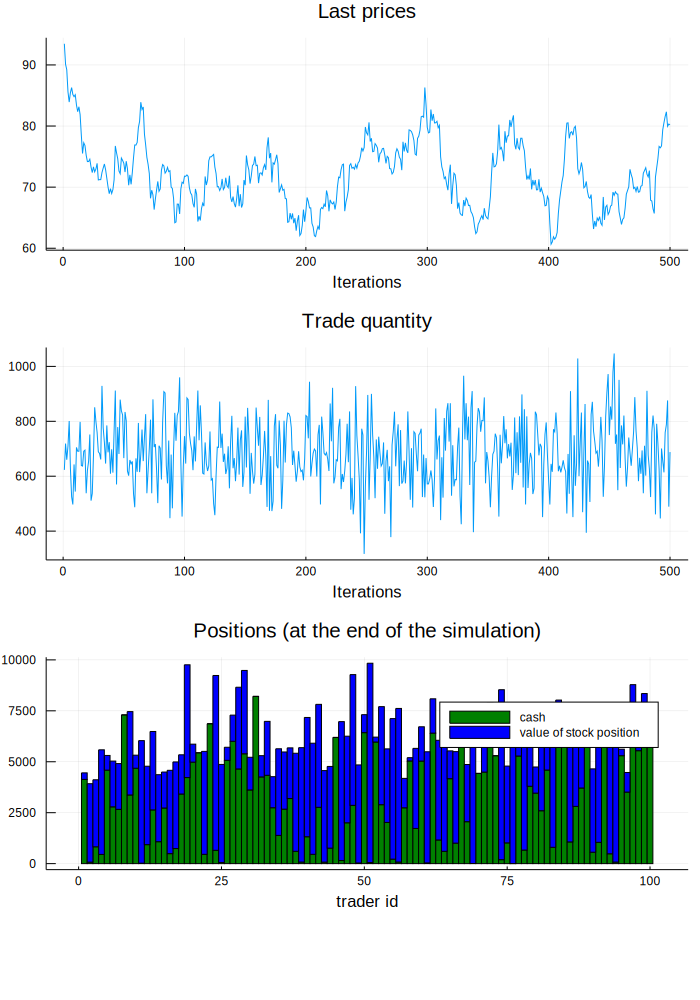

In [23]:
line_prices = plot(prices, label="", title="Last prices", xlabel="Iterations")
line_quantities = plot(quantities, label="", title="Trade quantity", xlabel="Iterations")
bar_positions = groupedbar(hcat(map(x-> x.cash, inv), map(x-> x.position * stock.last_price, inv))
    , bar_position = :stack, bar_width=1, labels=["cash", "value of stock position"], color = [:green :blue],
    title="Positions (at the end of the simulation)", xlabel="trader id")

plot(line_prices, line_quantities, bar_positions, layout = grid(3,1,heights=[0.3,0.3, 0.3]), size=[700,1000])

In [ ]:
# Derive Supply and Demand

n_iters = 300
starting_cash = 6000
n_stocks = 40
n_traders = 100

stock = DoubleAuctionMarket("NOK")
stock.last_price = 95
prices = Array{Float64,1}()
inv = [SingleAssetInvestor(
        "Player " * string(n), starting_cash, n_stocks
        , price_expr=price_expr, order_expr=order_expr, quantity_expr=quantity_expr
        ) for n in 1:n_traders]

for price in 1:1:200
    counter_order = SellLimitOrder("PlaceHolder", price=price, quantity=9999999999)
    for inv in shuffle(inv)
        print(stock.last_price)
        place!(inv, stock)
        clear!(stock)

for n in 1:n_iters
    println("Placing...")
    for inv in shuffle(inv)
        print(stock.last_price)
        place!(inv, stock)
        clear!(stock)
        print("Price: $(stock.last_price)")
    end
    push!(prices, stock.last_price)

    if n < n_iters
        cancel!(stock)
    end
end


In [ ]:
sell_prices = unique(map(x -> x.price, stock.sell_limit_orders))
sell_quantities = [-sum(map(x-> x.quantity, filter(x -> x.price ==price, stock.sell_limit_orders))) for price in sell_prices]

buy_prices = unique(map(x -> x.price, stock.buy_limit_orders))
buy_quantities = [sum(map(x -> x.quantity, filter(x -> x.price ==price, stock.buy_limit_orders))) for price in buy_prices]

bar(
    sell_prices, 
    sell_quantities, 
    orientation=:horizontal, bar_width = 0.01, color=:red, label="Sell", linewidth=0, xlabel="Quantity (negative for sell)", ylabel="Price")

bar!(
    buy_prices, 
    buy_quantities, 
    orientation=:horizontal, bar_width = 0.01, color=:green, label="Buy", linewidth=0)
vline!([0], color=:black, label="")
title!("Order book")

In [ ]:
n_iters = 1
starting_cash = 4000
n_stocks = 40
n_traders = 100

stock = DoubleAuctionMarket("NOK")
stock.last_price = 90

prices = Array{Float64,1}()
inv = [Investor(
        "Player " * string(n), starting_cash, n_stocks
        , price_expr=price_expr, order_expr=order_expr, quantity_expr=quantity_expr
        ) for n in 1:n_traders]

for inv in inv
    place!(inv, stock)
end



scatter(
    map(x-> x.quantity, stock.buy_limit_orders),
    map(x-> x.price, stock.buy_limit_orders),
    label="Buy", color=:green
)
scatter!(
    map(x-> -x.quantity, stock.sell_limit_orders),
    map(x-> x.price, stock.sell_limit_orders),
    label="Sell", color=:red
)
vline!([0], color="black", label="")
ps, qs = clear!(stock)

hline!([minimum(ps)], color=:green, label="Min price")
hline!([stock.last_price], color=:blue, label="Mean price")
hline!([maximum(ps)], color=:red, label="Max price")